# Tópicos Especiais / Feature Extraction and Classification


- Álvaro Ribeiro Fazio
- José Masiero

# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from time import time


from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using TensorFlow backend.


# Global Settings

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]
IMAGES_ROOT_DIRECTORY = './natural_images_100'

# Ler Imagens

In [3]:
# Read and label images
#-----------------------------------------------------------
def read_images_from_folders(data_set_path):
    data_set_images = []
    for dir_name in os.listdir(data_set_path):
        current_dir_name = data_set_path + '/' + dir_name + '/'
        for file_name in os.listdir(current_dir_name):
            data_set_images.append([dir_name,current_dir_name + file_name])
    return data_set_images

In [4]:
# Print a single image
#-----------------------------------------------------------
print(read_images_from_folders(IMAGES_ROOT_DIRECTORY)[0])

['fruit', './natural_images_100/fruit/fruit_0322.jpg']


# Feature Extraction

In [5]:
# Load model
#-----------------------------------------------------------
model = MobileNet(weights='imagenet', include_top=False, pooling='avg', alpha=0.5)

Instructions for updating:
Colocations handled automatically by placer.


/home/afazio/opt/anaconda3/envs/pylab/lib/python3.7/site-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [6]:
# Show model summary
#-----------------------------------------------------------
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 16)    432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 16)    64        
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 16)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 16)    144       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 16)    64        
__________

In [7]:
# Extract image features
#-----------------------------------------------------------
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_as_array = image.img_to_array(img)
    img_as_array = np.expand_dims(img_as_array, axis=0)
    img_as_array = preprocess_input(img_as_array)
    features = model.predict(img_as_array)
    return features

# Load images
#-----------------------------------------------------------
images = []
for folder,image_path in read_images_from_folders(IMAGES_ROOT_DIRECTORY):
    images.append([folder,image_path,extract_features(image_path,model)])

(1, 512) float32


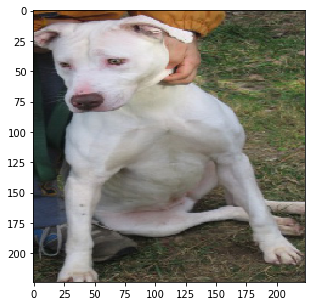

In [8]:
# Image sample
#-----------------------------------------------------------
print(images[100][2].shape, images[100][2].dtype)
plt.imshow(image.load_img(images[100][1], target_size=(224, 224)))
type(images[100][2])
x = images[100][2].tolist()
#print(x)

# Classificadores 

In [9]:
# Prepare train and test data
#-----------------------------------------------------------
images_train, images_test = train_test_split(images, test_size = 0.30, random_state = 64)

images_train_properties = []
images_train_label = []
for a,b,c in images_train:
    images_train_label.append(a)
    images_train_properties.append(c[0].tolist())
    
images_test_properties = []
images_test_label = []
images_test_image_path = []
for a,b,c in images_test:
    images_test_label.append(a)
    images_test_properties.append(c[0].tolist())
    images_test_image_path.append(b)

In [10]:
#print(images_test_properties[0])

## SVM

In [12]:
# SVM wit hyperparameters
#-----------------------------------------------------------
t0 = time()
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'decision_function_shape' : ['ovo','ovr']
             }

clf = GridSearchCV(SVC(class_weight='balanced'),
                   param_grid, 
                   cv=10, 
                   iid=False)
clf.fit(images_train_properties,images_train_label)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

done in 277.525s
Best estimator found by grid search:
SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [13]:
images_test_label_pred = clf.predict(images_test_properties)
print(classification_report(images_test_label, images_test_label_pred))

              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00        33
         car       1.00      1.00      1.00        30
         cat       1.00      1.00      1.00        33
         dog       1.00      1.00      1.00        24
      flower       1.00      1.00      1.00        32
       fruit       1.00      1.00      1.00        27
   motorbike       1.00      1.00      1.00        31
      person       1.00      1.00      1.00        30

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



dog / dog


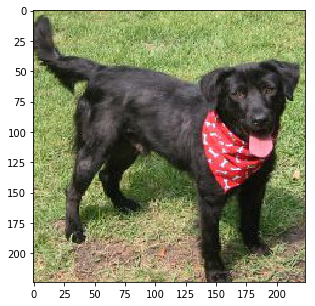

In [14]:
i = 13
print(images_test_label[i] + ' / ' + images_test_label_pred[i])
plt.imshow(image.load_img(images_test_image_path[i], target_size=(224, 224)))

# Decision Tree

# Comparação de Classificadores

# Execução de Predição

# Extra I (experimentação com outra rede)

# Extra II (Experimentar abordagens de agrupamento de dados)